In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [2]:
df = pd.read_csv("data1_29.csv")
df = df.drop(["Unnamed: 0"], axis=1)
df

,Y,X1,X2,X3,X4,X5
0,9.322878,-0.288420,-0.772270,-0.110498,A,1
1,6.138679,0.301875,0.304041,-1.352958,A,0
2,9.596653,-1.654424,-2.728827,-3.633465,A,0
3,3.001850,0.139284,0.684288,0.907004,A,1
4,5.597727,-0.551130,-0.209047,0.276865,A,0
...,...,...,...,...,...,...
995,8.480169,0.699948,0.755269,1.155607,B,1
996,3.018462,0.096423,0.203454,1.368110,A,1
997,10.461000,1.289688,0.118789,1.520666,B,1
998,-4.071126,-1.393463,-0.844735,0.976980,C,1


# EDA

Get information about dataset

In [3]:
df.describe()

,Y,X1,X2,X3,X5
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.399539,-0.006575,-0.005409,-0.005499,0.457000
std,9.228786,0.997083,1.000808,0.961169,0.498397
min,-74.575220,-3.038275,-2.939199,-3.633465,0.000000
25%,2.056105,-0.668037,-0.680985,-0.663155,0.000000
50%,5.573887,0.010308,-0.020704,0.008628,0.000000
75%,9.162895,0.691113,0.684088,0.626496,1.000000
max,38.250470,3.521644,3.369935,3.929481,1.000000


Check for null values

In [4]:
df.isnull().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
dtype: int64

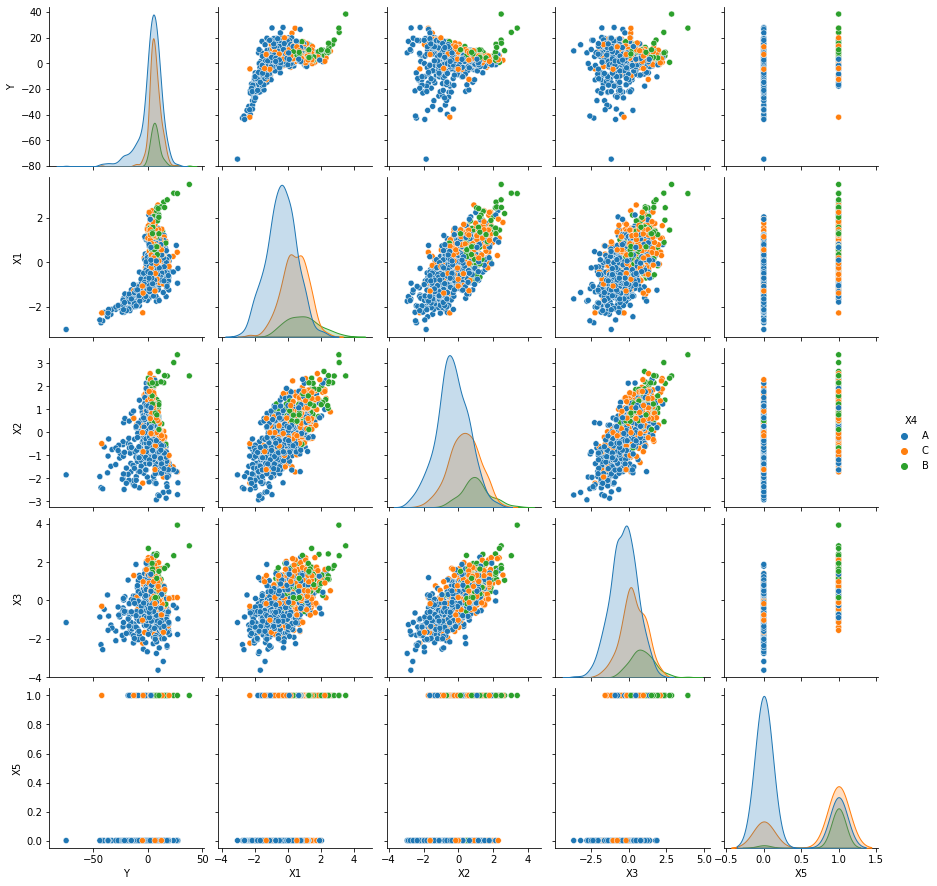

In [5]:
sns.pairplot(df, hue='X4', diag_kind='kde')

### We will use boxplot and countplot to visualize outliers and imbalance in categorical variables

<AxesSubplot:xlabel='X4', ylabel='count'>

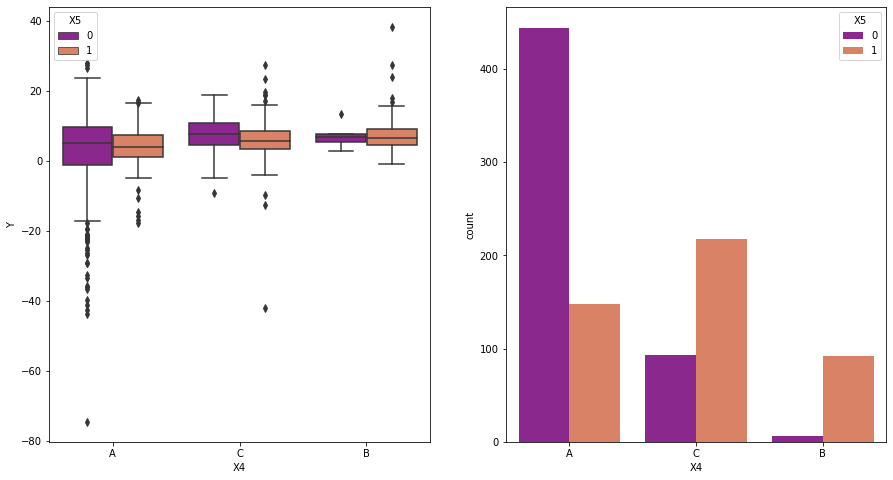

In [6]:
fig, axs = plt.subplots(ncols=2, figsize=(15,8))
sns.boxplot(x="X4", y="Y", data=df, hue="X5", ax=axs[0], palette='plasma')
sns.countplot(x="X4", data=df, hue="X5", ax=axs[1], palette='plasma')

<AxesSubplot:xlabel='X5', ylabel='count'>

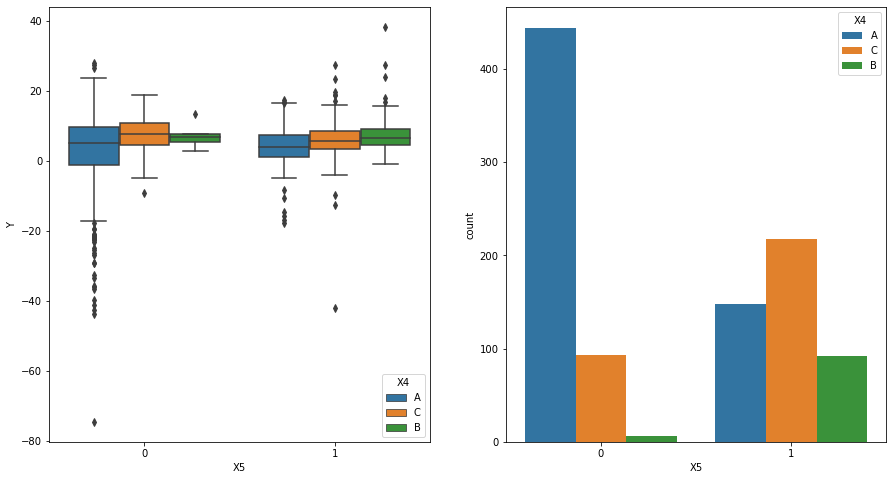

In [7]:
fig, axs = plt.subplots(ncols=2, figsize=(15,8))
sns.boxplot(x="X5", y="Y", data=df, hue="X4", ax=axs[0])
sns.countplot(x="X5", data=df, hue="X4", ax=axs[1])

### Scatterplot to visualize interaction of quantitative with categorical variable, response vs. predictors

<AxesSubplot:xlabel='X3', ylabel='Y'>

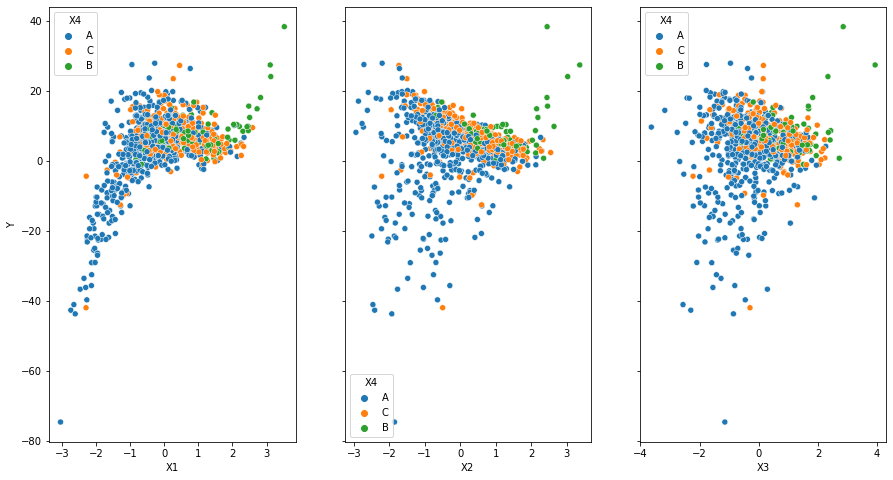

In [8]:
fig, axs = plt.subplots(ncols=3, sharey=True, figsize=(15,8))
sns.scatterplot(x="X1", y="Y", data=df, hue="X4", ax=axs[0])
sns.scatterplot(x="X2", y="Y", data=df, hue="X4", ax=axs[1])
sns.scatterplot(x="X3", y="Y", data=df, hue="X4", ax=axs[2])

<AxesSubplot:xlabel='X3', ylabel='Y'>

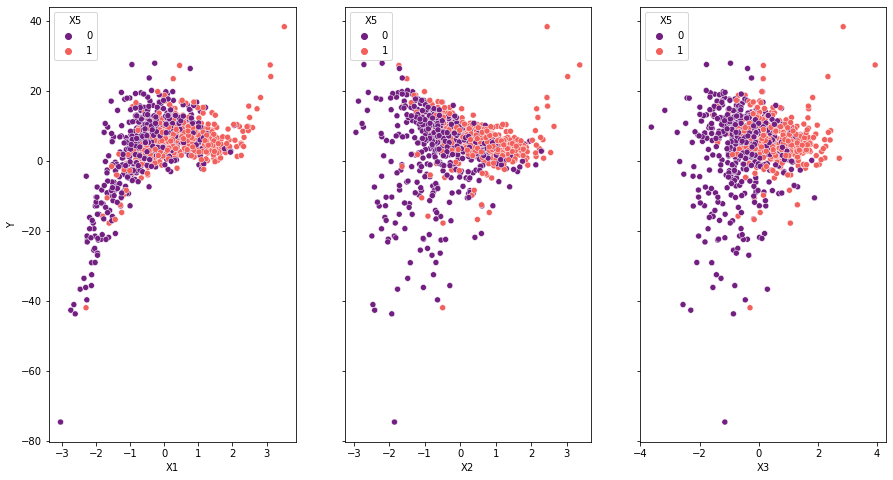

In [9]:
fig, axs = plt.subplots(ncols=3, sharey=True, figsize=(15,8))
sns.scatterplot(x="X1", y="Y", data=df, hue="X5", ax=axs[0], palette='magma')
sns.scatterplot(x="X2", y="Y", data=df, hue="X5", ax=axs[1], palette='magma')
sns.scatterplot(x="X3", y="Y", data=df, hue="X5", ax=axs[2], palette='magma')

### Factorizing X4 variable to numeric datatype

In [10]:
df['X4'] = pd.factorize(df['X4'], sort=True)[0]
df

,Y,X1,X2,X3,X4,X5
0,9.322878,-0.288420,-0.772270,-0.110498,0,1
1,6.138679,0.301875,0.304041,-1.352958,0,0
2,9.596653,-1.654424,-2.728827,-3.633465,0,0
3,3.001850,0.139284,0.684288,0.907004,0,1
4,5.597727,-0.551130,-0.209047,0.276865,0,0
...,...,...,...,...,...,...
995,8.480169,0.699948,0.755269,1.155607,1,1
996,3.018462,0.096423,0.203454,1.368110,0,1
997,10.461000,1.289688,0.118789,1.520666,1,1
998,-4.071126,-1.393463,-0.844735,0.976980,2,1


<AxesSubplot:>

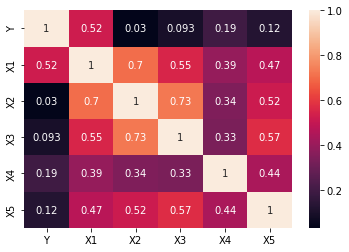

In [11]:
sns.heatmap(df.corr(), annot=True)

### Scatterplot to visualize interaction of quantitative with categorical variable, predictors vs. predictors

<AxesSubplot:xlabel='X3', ylabel='X1'>

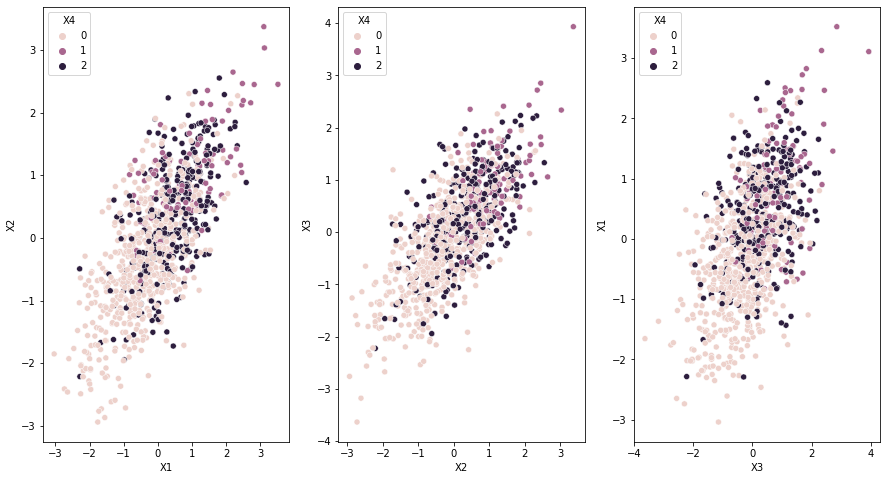

In [12]:
fig, axs = plt.subplots(ncols=3, figsize=(15,8))
sns.scatterplot(x="X1", y="X2", data=df, hue="X4", ax=axs[0])
sns.scatterplot(x="X2", y="X3", data=df, hue="X4", ax=axs[1])
sns.scatterplot(x="X3", y="X1", data=df, hue="X4", ax=axs[2])

<AxesSubplot:xlabel='X3', ylabel='X1'>

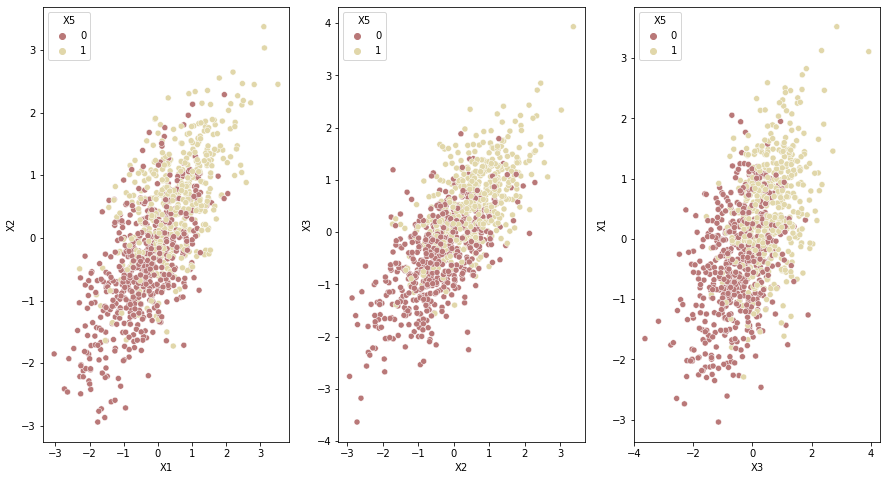

In [13]:
fig, axs = plt.subplots(ncols=3, figsize=(15,8))
sns.scatterplot(x="X1", y="X2", data=df, hue="X5", ax=axs[0], palette="pink")
sns.scatterplot(x="X2", y="X3", data=df, hue="X5", ax=axs[1], palette="pink")
sns.scatterplot(x="X3", y="X1", data=df, hue="X5", ax=axs[2], palette="pink")

### Trying to scale predictor to check parallel interaction of predictors

In [14]:
df_denorm = df.copy()
df_denorm["X2"] = df_denorm["X2"] * 100000
df_denorm

,Y,X1,X2,X3,X4,X5
0,9.322878,-0.288420,-77226.990636,-0.110498,0,1
1,6.138679,0.301875,30404.118918,-1.352958,0,0
2,9.596653,-1.654424,-272882.666144,-3.633465,0,0
3,3.001850,0.139284,68428.826660,0.907004,0,1
4,5.597727,-0.551130,-20904.728864,0.276865,0,0
...,...,...,...,...,...,...
995,8.480169,0.699948,75526.886615,1.155607,1,1
996,3.018462,0.096423,20345.418546,1.368110,0,1
997,10.461000,1.289688,11878.923915,1.520666,1,1
998,-4.071126,-1.393463,-84473.505559,0.976980,2,1


<AxesSubplot:xlabel='X2', ylabel='Y'>

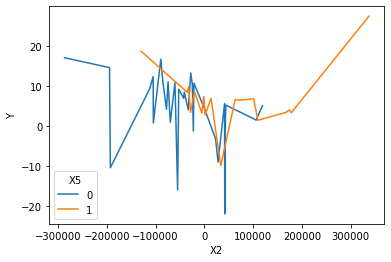

In [15]:
sns.lineplot(x="X2", y="Y", data=df_denorm.sample(frac=0.05), hue="X5")

In [16]:
# fig, axs = plt.subplots(ncols=3)
# sns.lineplot(x="X1", y="Y", data=df, hue="X5", ax=axs[0])
# sns.lineplot(x="X2", y="Y", data=df, hue="X5", ax=axs[1])
# sns.lineplot(x="X3", y="Y", data=df, hue="X5", ax=axs[2])

## Checking multicollinearity

In [17]:
{df.columns[i]: variance_inflation_factor(df.values, i) for i in range(1, df.shape[1])}

{'X1': 3.411730032048098,
 'X2': 3.842620479487404,
 'X3': 2.252442753635214,
 'X4': 1.936203751652555,
 'X5': 2.183677355991464}

From above calculation of VIF we can observe that there is no multicollinearity. 

In [18]:
# x4 = pd.get_dummies(df['X4'], prefix='X4')
# x5 = pd.get_dummies(df['X5'], prefix='X5')

# df_1 = df.copy()
# df_ = df.copy()
# df_ = pd.concat([df_1, x4, x5], axis=1)
# df_ = df_.drop(["X4", "X5"], axis=1)
# df_

# Modeling

In [19]:
# x = df_[["X1", "X2", "X3", "X4_0", "X4_1", "X4_2", "X5_0", "X5_1"]]
# y = df_["Y"]
x = df[["X1", "X2", "X3", "X4", "X5"]]
y = df["Y"]
x = sm.add_constant(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

## 1. Model without interaction

In [20]:
data_train = pd.concat([x_train, y_train], axis=1)

# model = smf.ols(formula="Y ~ X1 + X2 + X3 + X4_0 + X4_1 + X4_2 + X5_0 + X5_1", data=data_train)
model_wo_int = smf.ols(formula="Y ~ X1 + X2 + X3 + X4 + X5", data=data_train)
model_fit = model_wo_int.fit() 
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     135.9
Date:                Thu, 03 Nov 2022   Prob (F-statistic):          2.21e-100
Time:                        10:53:42   Log-Likelihood:                -2287.1
No. Observations:                 700   AIC:                             4586.
Df Residuals:                     694   BIC:                             4614.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1319      0.392     10.546      0.000       3.363       4.901
X1             8.6686      0.352     24.630      0.000       7.978       9.360
X2            -6.3594      0.416    -15.293      0.000      -7.176      -5.543
X3             0.7712      0.385      2.001      0.046       0.014       1.528
X4             0.6548      0.300      2.185      0.029       0.066       1.243
X5            -0.3822      0.631     -0.606      0.545      -1.621       0.857
==============================================================================
Omnibus:                      285.734   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1481.995
Skew:                          -1.786   Prob(JB):                         0.00
Kurtosis:                       9.169   Cond. No.                         4.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
y_test_pred = model_fit.predict(x_test)
sq = (y_test_pred-y_test)**2 
model_wo_int_sqm = sq.mean()
model_wo_int_sqm

49.510868964432255

## 2. Model with interaction

In [22]:
data_train = pd.concat([x_train, y_train], axis=1)

# model = smf.ols(formula="Y ~ X1 + X2 + X3 + X4_0 + X4_1 + X4_2 + X5_0 + X5_1", data=data_train)
model_w_int = smf.ols(formula="Y ~ X1 + X2 + X3 + X4 + X5 + X1:X5 + X2:X5 + X3:X5 + X1:X4 + X2:X4 + X3:X4 + X1:X2 + X2:X3 \
                      + X3:X1 + X4:X5 + X1:X2:X5 + X2:X3:X5 + X3:X1:X5 + X1:X2:X4 + X2:X3:X4 + X3:X1:X4 + X1:X2:X3 \
                      + X4:X5:X1 + X4:X5:X2 +X4:X5:X3", data=data_train)
model_fit = model_w_int.fit() 
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     90.71
Date:                Thu, 03 Nov 2022   Prob (F-statistic):          1.16e-196
Time:                        10:53:42   Log-Likelihood:                -2010.3
No. Observations:                 700   AIC:                             4073.
Df Residuals:                     674   BIC:                             4191.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5621      0.326     13.978      0.000       3.921       5.203
X1             8.9176      0.451     19.785      0.000       8.033       9.803
X2            -8.8000      0.494    -17.826      0.000      -9.769      -7.831
X3             0.6986      0.458      1.527      0.127      -0.200       1.597
X4             1.2913      0.345      3.745      0.000       0.614       1.968
X5             0.7283      0.623      1.169      0.243      -0.495       1.952
X1:X5         -2.4047      0.895     -2.686      0.007      -4.163      -0.647
X2:X5          3.3099      0.971      3.408      0.001       1.403       5.217
X3:X5         -1.5810      0.895     -1.766      0.078      -3.339       0.177
X1:X4         -2.3095      0.481     -4.804      0.000      -3.253      -1.365
X2:X4          1.2817      0.523      2.453      0.014       0.256       2.308
X3:X4          0.0633      0.516      0.123      0.902      -0.950       1.077
X1:X2         -4.2387      0.409    -10.370      0.000      -5.041      -3.436
X2:X3          4.6842      0.413     11.330      0.000       3.872       5.496
X3:X1         -2.9003      0.508     -5.712      0.000      -3.897      -1.903
X4:X5         -0.1097      0.501     -0.219      0.827      -1.093       0.873
X1:X2:X5       2.7634      0.650      4.254      0.000       1.488       4.039
X2:X3:X5      -1.8482      0.862     -2.145      0.032      -3.540      -0.156
X3:X1:X5       0.5742      0.969      0.593      0.553      -1.328       2.476
X1:X2:X4       0.5937      0.373      1.594      0.112      -0.138       1.325
X2:X3:X4      -0.9175      0.439     -2.088      0.037      -1.780      -0.055
X3:X1:X4       0.8828      0.497      1.776      0.076      -0.093       1.859
X1:X2:X3       0.8143      0.193      4.228      0.000       0.436       1.192
X4:X5:X1       0.4903      0.740      0.663      0.508      -0.962       1.942
X4:X5:X2      -1.3684      0.773     -1.769      0.077      -2.887       0.150
X4:X5:X3       0.0054      0.756      0.007      0.994      -1.479       1.490
==============================================================================
Omnibus:                      125.392   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              321.175
Skew:                          -0.921   Prob(JB):                     1.81e-70
Kurtosis:                       5.760   Cond. No.                         41.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Adjusted R-squared value has increased from 0.491 to 0.762. Hence, adding interaction terms contribute in meaningful way.
Following interaction terms are not statistically significant (i.e. having p-value > 0.05):
1. Two way interaction - X3:X5, X3:X4, X4:X5
2. Three way interaction - X3:X1:X5, X1:X2:X4, X3:X1:X4, X4:X5:X1, X4:X5:X2, X4:X5:X3  

In [23]:
# data_train = pd.concat([x_train, y_train], axis=1)

# # model = smf.ols(formula="Y ~ X1 + X2 + X3 + X4_0 + X4_1 + X4_2 + X5_0 + X5_1", data=data_train)
# model_w_int = smf.ols(formula="Y ~ X1 + X2 + X3 + X4 + X5 + X1:X5 + X2:X5 + X1:X4 + X2:X4 + X1:X2 + X2:X3 + X3:X1 + X1:X2:X5 + X2:X3:X5 + X2:X3:X4 + X1:X2:X3", data=data_train)
# model_fit = model_w_int.fit() 
# model_fit.summary()

In [24]:
y_train_pred = model_fit.predict(x_train)
sq = (y_train_pred-y_train)**2 
sq.mean()

18.281531624411034

In [25]:
y_test_pred = model_fit.predict(x_test)
sq = (y_test_pred-y_test)**2 
model_w_int_sqm = sq.mean()
model_w_int_sqm

28.805801389102555

### Checking assumption of linearity, zero mean, normality, presence of outliers, and constant variance

In [26]:
residual_train = y_train - y_train_pred
residual_test = y_test - y_test_pred

/Users/sanchitvj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Residual')

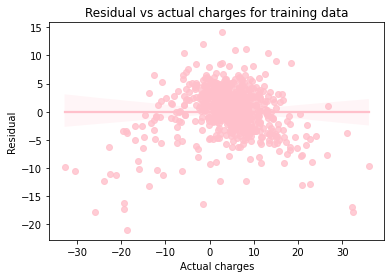

In [27]:
sns.regplot(y_train_pred, residual_train, color='pink')
plt.title("Residual vs actual charges for training data")
plt.xlabel("Actual charges")
plt.ylabel("Residual")

/Users/sanchitvj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Residual')

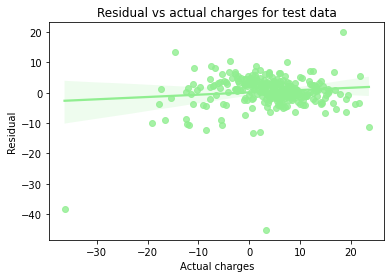

In [28]:
sns.regplot(y_test_pred, residual_test, color='lightgreen')
plt.title("Residual vs actual charges for test data")
plt.xlabel("Actual charges")
plt.ylabel("Residual")

Above two plots show that condition of linearity is met.

Residual mean:  1.476660064067151e-14


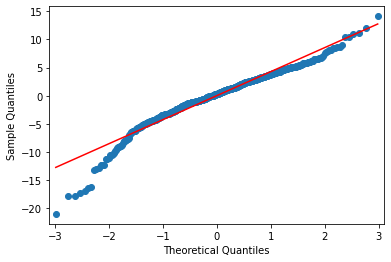

In [29]:
res = model_fit.resid
# residuals
print("Residual mean: ", res.mean())
fig = sm.qqplot(res, line="s")
plt.show()

In QQ-plot points are not following straight line pattern so condition of normality is not satisfied. The mean is approximately zero, so this condition is satisfied.

/Users/sanchitvj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

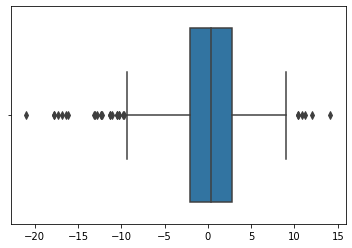

In [30]:
sns.boxplot(res)

Above boxplot shows that there are outliers.

In [31]:
#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(res, model_fit.model.exog)
lzip(names, test)

[('Lagrange multiplier statistic', 108.63308126526977),
 ('p-value', 2.1226208939467333e-12),
 ('f-value', 4.952505421131653),
 ('f p-value', 1.326859907123668e-13)]

## 3. Now we will model with try log-transformation of dependent variable

In [32]:
log_y = np.log(y_train)
data_train = pd.concat([x_train, log_y], axis=1)

# model = smf.ols(formula="Y ~ X1 + X2 + X3 + X4_0 + X4_1 + X4_2 + X5_0 + X5_1", data=data_train)
model_w_int_logy = smf.ols(formula="Y ~ X1 + X2 + X3 + X4 + X5 + X1:X5 + X2:X5 + X3:X5 + X1:X4 + X2:X4 + X3:X4 + X1:X2 \
                           + X2:X3 + X3:X1 + X4:X5 + X1:X2:X5 + X2:X3:X5 + X3:X1:X5 + X1:X2:X4 + X2:X3:X4 + X3:X1:X4 \
                           + X1:X2:X3 + X4:X5:X1 + X4:X5:X2 +X4:X5:X3", data=data_train)
model_fit = model_w_int_logy.fit() 
model_fit.summary()

/Users/sanchitvj/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     23.85
Date:                Thu, 03 Nov 2022   Prob (F-statistic):           4.27e-72
Time:                        10:53:44   Log-Likelihood:                -520.36
No. Observations:                 587   AIC:                             1093.
Df Residuals:                     561   BIC:                             1206.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4074      0.051     27.618      0.000       1.307       1.507
X1             0.7610      0.089      8.520      0.000       0.586       0.936
X2            -1.1401      0.080    -14.236      0.000      -1.297      -0.983
X3            -0.0051      0.070     -0.072      0.942      -0.143       0.133
X4             0.2681      0.054      4.974      0.000       0.162       0.374
X5             0.0803      0.094      0.858      0.391      -0.104       0.264
X1:X5         -0.0657      0.165     -0.398      0.691      -0.390       0.259
X2:X5          0.0888      0.164      0.540      0.590      -0.234       0.412
X3:X5          0.2800      0.139      2.010      0.045       0.006       0.554
X1:X4         -0.2246      0.087     -2.595      0.010      -0.395      -0.055
X2:X4          0.2103      0.088      2.379      0.018       0.037       0.384
X3:X4          0.0519      0.083      0.626      0.532      -0.111       0.215
X1:X2          0.0271      0.083      0.327      0.744      -0.136       0.190
X2:X3          0.1027      0.080      1.280      0.201      -0.055       0.260
X3:X1         -0.1921      0.118     -1.625      0.105      -0.424       0.040
X4:X5         -0.0545      0.076     -0.716      0.474      -0.204       0.095
X1:X2:X5       0.1569      0.112      1.402      0.161      -0.063       0.377
X2:X3:X5      -0.1006      0.141     -0.711      0.477      -0.378       0.177
X3:X1:X5      -0.1464      0.180     -0.812      0.417      -0.500       0.208
X1:X2:X4      -0.1176      0.063     -1.861      0.063      -0.242       0.007
X2:X3:X4       0.0248      0.073      0.341      0.733      -0.118       0.168
X3:X1:X4       0.0952      0.094      1.016      0.310      -0.089       0.279
X1:X2:X3       0.1119      0.030      3.766      0.000       0.054       0.170
X4:X5:X1       0.0636      0.132      0.483      0.629      -0.195       0.322
X4:X5:X2      -0.0659      0.128     -0.516      0.606      -0.317       0.185
X4:X5:X3      -0.1906      0.114     -1.678      0.094      -0.414       0.033
==============================================================================
Omnibus:                      297.946   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2706.035
Skew:                          -2.051   Prob(JB):                         0.00
Kurtosis:                      12.686   Cond. No.                         54.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
y_test_pred = model_fit.predict(x_test)
sq = (y_test_pred - y_test)**2 
model_w_int_logy_sqm = sq.mean()
model_w_int_logy_sqm

96.07402904817131

Residual mean:  4.288449209599796e-15


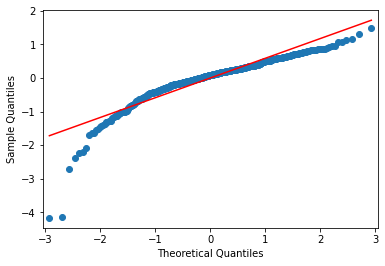

In [34]:
res = model_fit.resid
# residuals
print("Residual mean: ", res.mean())
fig = sm.qqplot(res, line='s')
plt.show()

Doing log transform did not help in assumption of normality.

## 4. Model with outliers removed

In [35]:
df_out = df.copy()
for c in ["Y", "X1", "X2", "X3", "X4", "X5"]:
    for x in [c]:
        q75,q25 = np.percentile(df_out.loc[:,x],[75,25])
        intr_qr = q75-q25

        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)

        df_out.loc[df_out[x] < min,x] = np.nan
        df_out.loc[df_out[x] > max,x] = np.nan

In [36]:
df_out = df_out.dropna()
df_out.isnull().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
dtype: int64

In [37]:
df_out

,Y,X1,X2,X3,X4,X5
0,9.322878,-0.288420,-0.772270,-0.110498,0.0,1.0
1,6.138679,0.301875,0.304041,-1.352958,0.0,0.0
3,3.001850,0.139284,0.684288,0.907004,0.0,1.0
4,5.597727,-0.551130,-0.209047,0.276865,0.0,0.0
5,10.598747,-0.324320,-0.848918,-1.206986,0.0,0.0
...,...,...,...,...,...,...
995,8.480169,0.699948,0.755269,1.155607,1.0,1.0
996,3.018462,0.096423,0.203454,1.368110,0.0,1.0
997,10.461000,1.289688,0.118789,1.520666,1.0,1.0
998,-4.071126,-1.393463,-0.844735,0.976980,2.0,1.0


In [38]:
x_ = df_out[["X1", "X2", "X3", "X4", "X5"]]
y_ = df_out["Y"]
x_ = sm.add_constant(x_)
x_train_, x_test_, y_train_, y_test_ = train_test_split(x_, y_, test_size=0.3, random_state=123)

In [39]:
data_train = pd.concat([x_train_, y_train_], axis=1)

# model = smf.ols(formula="Y ~ X1 + X2 + X3 + X4_0 + X4_1 + X4_2 + X5_0 + X5_1", data=data_train)
model_w_int_out = smf.ols(formula="Y ~ X1 + X2 + X3 + X4 + X5 + X1:X5 + X2:X5 + X3:X5 + X1:X4 + X2:X4 + X3:X4 + X1:X2 \
                          + X2:X3 + X3:X1 + X4:X5 + X1:X2:X5 + X2:X3:X5 + X3:X1:X5 + X1:X2:X4 + X2:X3:X4 + X3:X1:X4 \
                          + X1:X2:X3 + X4:X5:X1 + X4:X5:X2 +X4:X5:X3", data=data_train)
model_fit = model_w_int_out.fit() 
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     54.24
Date:                Thu, 03 Nov 2022   Prob (F-statistic):          3.66e-137
Time:                        10:53:44   Log-Likelihood:                -1592.4
No. Observations:                 637   AIC:                             3237.
Df Residuals:                     611   BIC:                             3353.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9773      0.242     20.583      0.000       4.502       5.452
X1             6.1482      0.362     16.983      0.000       5.437       6.859
X2            -7.2386      0.388    -18.636      0.000      -8.001      -6.476
X3             0.6303      0.343      1.837      0.067      -0.043       1.304
X4             1.2747      0.253      5.048      0.000       0.779       1.771
X5             0.5845      0.411      1.424      0.155      -0.222       1.391
X1:X5         -1.0745      0.635     -1.692      0.091      -2.321       0.172
X2:X5          1.9985      0.685      2.918      0.004       0.654       3.343
X3:X5         -1.3221      0.649     -2.038      0.042      -2.596      -0.048
X1:X4         -1.0187      0.355     -2.873      0.004      -1.715      -0.322
X2:X4          0.7310      0.355      2.057      0.040       0.033       1.429
X3:X4         -0.0636      0.378     -0.168      0.867      -0.807       0.680
X1:X2         -2.1813      0.352     -6.201      0.000      -2.872      -1.490
X2:X3          2.7138      0.356      7.633      0.000       2.016       3.412
X3:X1         -1.1341      0.468     -2.425      0.016      -2.053      -0.216
X4:X5         -0.1032      0.350     -0.295      0.768      -0.791       0.584
X1:X2:X5       1.2255      0.483      2.536      0.011       0.276       2.175
X2:X3:X5      -0.9786      0.539     -1.815      0.070      -2.037       0.080
X3:X1:X5      -0.1164      0.722     -0.161      0.872      -1.535       1.302
X1:X2:X4      -0.0516      0.248     -0.209      0.835      -0.538       0.434
X2:X3:X4      -0.3380      0.285     -1.185      0.236      -0.898       0.222
X3:X1:X4       0.5011      0.363      1.380      0.168      -0.212       1.214
X1:X2:X3       0.8642      0.200      4.314      0.000       0.471       1.258
X4:X5:X1      -0.4953      0.528     -0.938      0.348      -1.532       0.541
X4:X5:X2      -0.3202      0.534     -0.599      0.549      -1.370       0.729
X4:X5:X3      -0.1999      0.550     -0.364      0.716      -1.280       0.880
==============================================================================
Omnibus:                        7.031   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                7.172
Skew:                          -0.206   Prob(JB):                       0.0277
Kurtosis:                       3.316   Cond. No.                         36.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
y_test_pred = model_fit.predict(x_test_)
sq = (y_test_pred - y_test_)**2 
model_w_int_out_sqm = sq.mean() 
model_w_int_out_sqm

8.336651054559551

Residual mean:  2.5959349792742436e-14


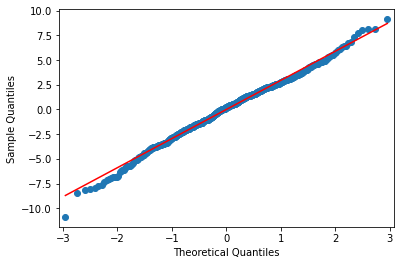

In [41]:
res = model_fit.resid
# residuals
print("Residual mean: ", res.mean())
fig = sm.qqplot(res, line='s')
plt.show()

Assumption of normality is satisfied after removing outlier.

/Users/sanchitvj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

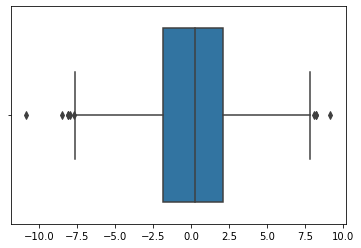

In [42]:
sns.boxplot(res)

In [43]:
#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(res, model_fit.model.exog)
lzip(names, test)

[('Lagrange multiplier statistic', 98.65613680922691),
 ('p-value', 1.0555249854972249e-10),
 ('f-value', 4.47883991716102),
 ('f p-value', 9.961054783967718e-12)]

With the new dataset excluding outliers we are achieving the normality but assumption of homoscedasticity remains unsatisfied.

# Comparing candidate models.
1. Without interaction terms.
2. With interaction terms.
3. With interaction and dependent variable log transformed.
4. With interaction and outliers removed.

## AIC of training

In [44]:
# model_wo_int, model_w_int, model_w_int_logy, model_w_int_out
print("Model without interaction: 4586")
print("Model with interaction: 4073")
print("Model with interaction and log transformed dependent variable: 1093")
print("Model with interaction and outliers removed: 3237")

Model without interaction: 4586
Model with interaction: 4073
Model with interaction and log transformed dependent variable: 1093
Model with interaction and outliers removed: 3237


## MSE of testing

In [45]:
# model_wo_int, model_w_int, model_w_int_logy, model_w_int_out
print("Model without interaction: ", model_wo_int_sqm)
print("Model with interaction: ", model_w_int_sqm)
print("Model with interaction and log transformed dependent variable: ", model_w_int_logy_sqm)
print("Model with interaction and outliers removed: ", model_w_int_out_sqm)

Model without interaction:  49.510868964432255
Model with interaction:  28.805801389102555
Model with interaction and log transformed dependent variable:  96.07402904817131
Model with interaction and outliers removed:  8.336651054559551


### From above comparison we can see that 4th model has least test MSE and comparatively lower AIC. So we will go with the 4th model, with interaction and outliers removed, as our best model.